In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!ls "/content/gdrive/My Drive/skillfactory_ds_full_course/data"


tips.xls


In [3]:
# importing libs
import pandas as pd
import numpy as np

In [4]:
# Reading data
tips_df = pd.read_csv("/content/gdrive/My Drive/skillfactory_ds_full_course/data/tips.xls")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
# max bil
round(tips_df.total_bill.max(),2)

50.81

In [7]:
%matplotlib inline

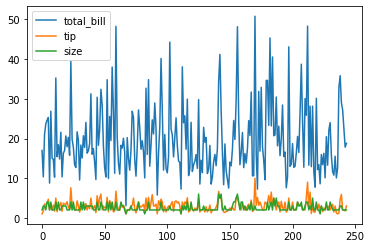

In [8]:
tips_df.plot()

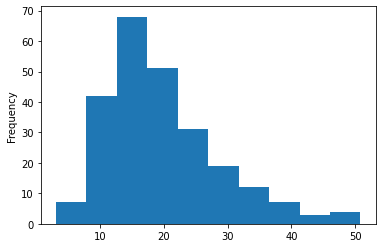

In [9]:
tips_df['total_bill'].plot(kind = 'hist')

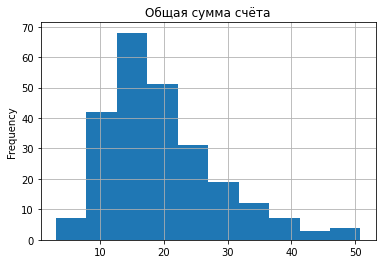

In [10]:
tips_df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

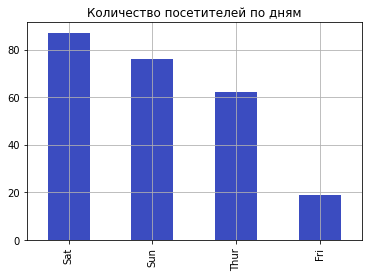

In [11]:
tips_df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

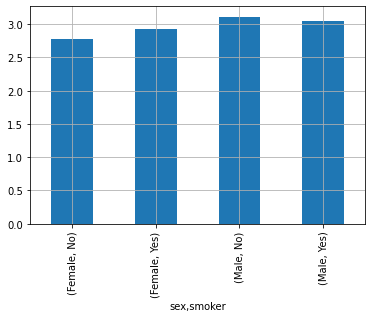

In [12]:
tips_df.groupby(by=['sex','smoker'])['tip'].mean().plot(kind = 'bar',grid = True)

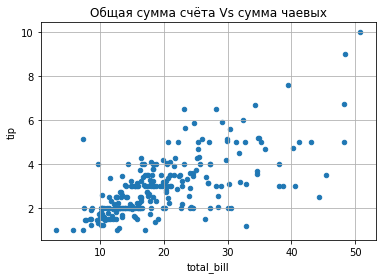

In [13]:
tips_df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

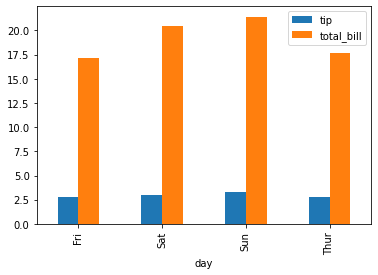

In [14]:
tips_df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

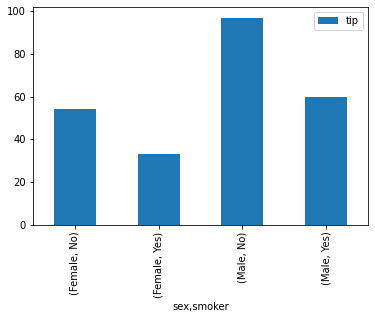

In [15]:
tips_df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

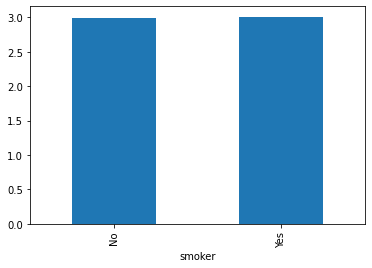

In [16]:
tips_df.groupby('smoker')['tip'].mean().plot(kind = 'bar')

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



Text(0.5, 0, 'Сумма заказа, USD')

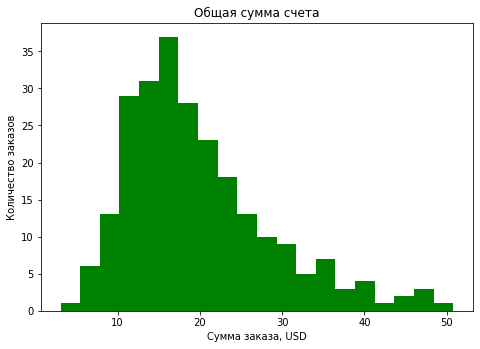

In [20]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(tips_df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')


Text(0, 0.5, 'Размер чаевых')

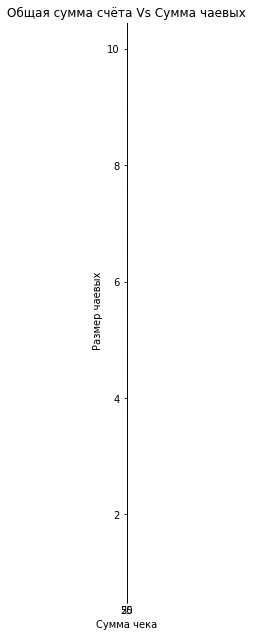

In [31]:
fig = plt.figure()
#original
#axes = fig.add_axes([0, 0, 1, 1])

# Height is bigger width
#axes = fig.add_axes([0.2, 0.2, 0.5, 0.9])
#axes = fig.add_axes([0.1,0.1,1,2])


# Width is bigger height
#axes = fig.add_axes([0, 0, 0.9, 0.5])
#axes = fig.add_axes([2,0,0,2])

axes.scatter(x = tips_df['total_bill'], y = tips_df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

In [32]:
df = tips_df.copy()
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

<BarContainer object of 4 artists>

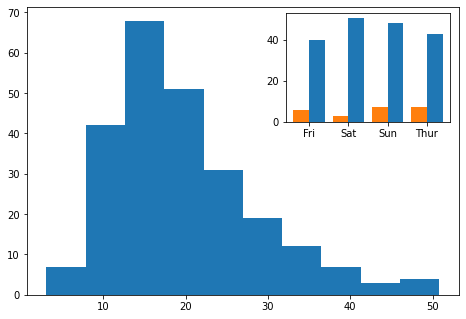

In [34]:
fig = plt.figure()
main_axes = fig.add_axes([0,0,1,1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6,0.6,0.38,0.38])
'''
Параметр align указывает, следует ли размещать столбцы для отображения каждого значения в центре или необходимо сместить их к краю. 
С помощью параметра width мы задаём ширину столбца в долях единицы относительно ширины всего пространства, выделенного для данного столбца.
'''

insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'],width = 0.4, align = 'edge')
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'],width = -0.4, align = 'edge')

Text(0.5, 1.0, 'Общая сумма счета VS Сумма чаевых')

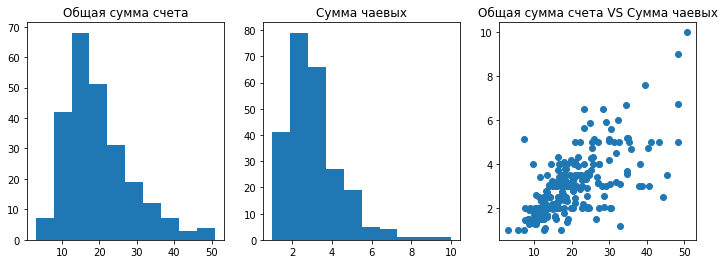

In [38]:
fig, axes = plt.subplots(1,3,figsize=(12,4))
axes[0].hist(df['total_bill'])
axes[0].set_title('Общая сумма счета')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes[2].set_title('Общая сумма счета VS Сумма чаевых')


# 10.8 Создание линейных графиков

In [39]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

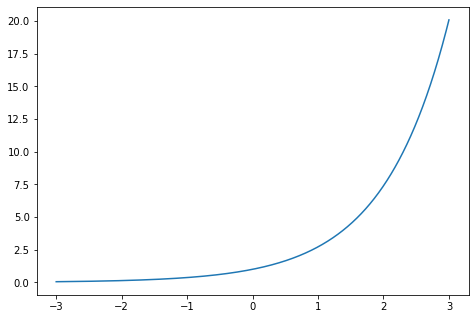

In [40]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1)

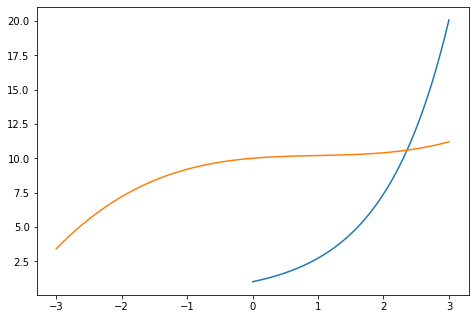

In [42]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

**Стили линий**

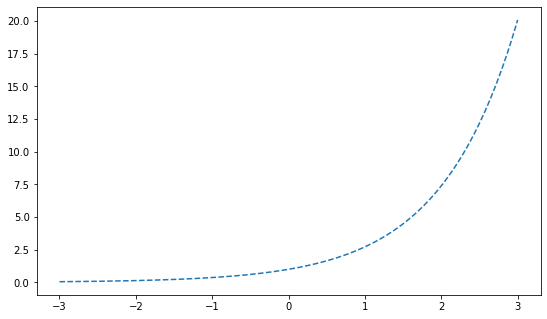

In [44]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')

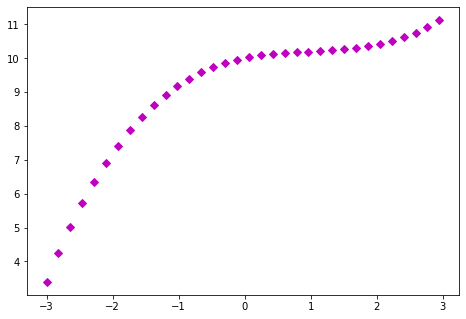

In [43]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

# Гистограммы распределения признаков

Seaborn — графическая библиотека с большими функциональными возможностями, позволяющая создавать разные типы графиков и использовать расширенные настройки при оформлении. Многие функции Seaborn интегрируются с библиотекой Matplotlib, что создает дополнительные возможности для творчества при визуализации данных.

Импортируем библиотеки Seaborn, Matplotlib и Pandas для работы с датафреймами и корректного отображения информации в jupyter notebook:

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


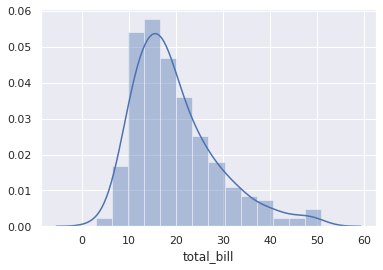

In [46]:
sns.set()
sns.distplot(df['total_bill'])

Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними. Тип графика, используемый для этого, называется jointplot:

Характер представления информации в центральной части графика можно регулировать с помощью параметра kind. Например, kind = 'reg' выводит на экран не только точки, представляющие данные об отдельных посещениях ресторана, но и линию регрессии, выражающую общий характер связи между двумя величинами:

kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }

Reg
Scatter
KDE
HEX
Resid


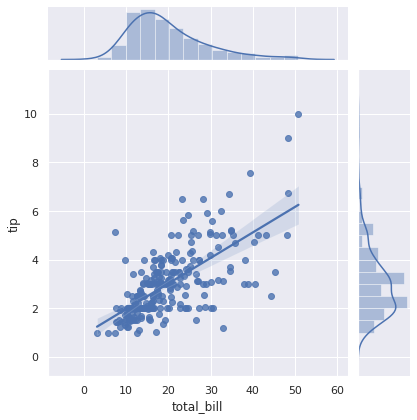

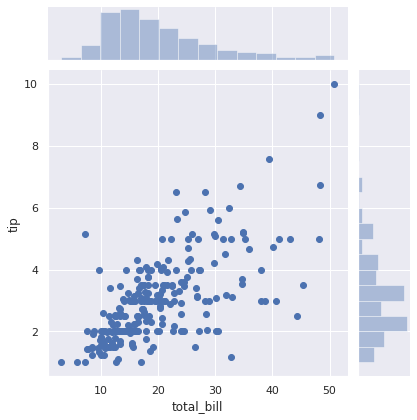

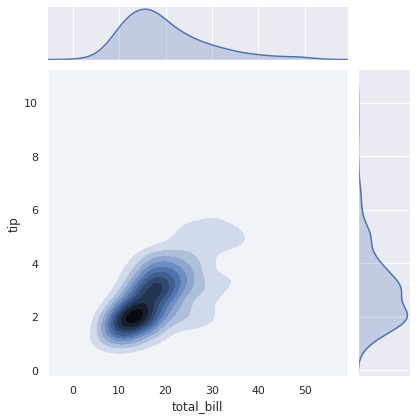

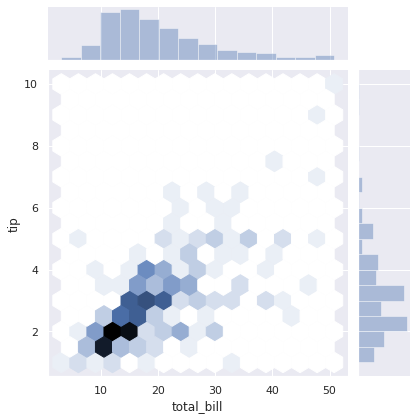

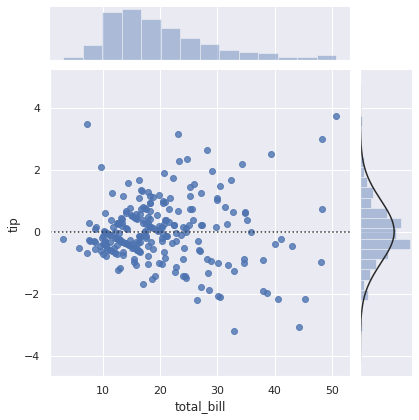

In [52]:
print('Reg')
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind='reg')
print('Scatter')
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind='scatter')
print('KDE')
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind='kde')
print('HEX')
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind='hex')
print('Resid')
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind='resid')

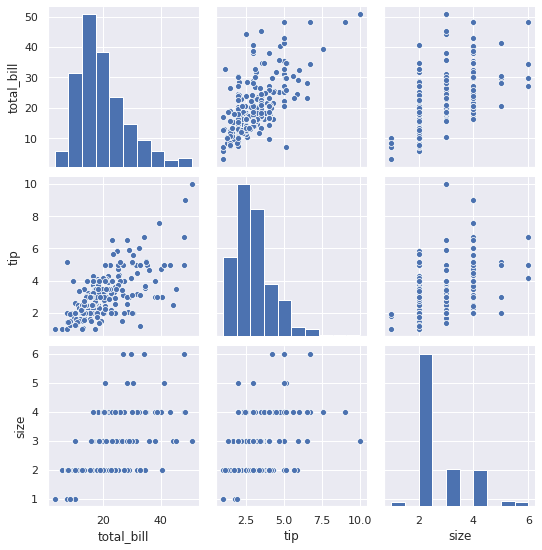

In [48]:
sns.pairplot(df)

# Python 10.10
Работа с категориальными признаками

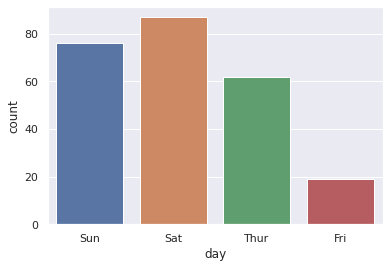

In [53]:
sns.countplot( x ='day', data= df)

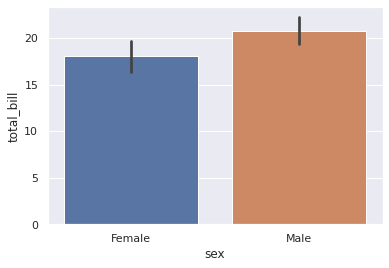

In [54]:
sns.barplot( x = 'sex', y = 'total_bill', data=df)

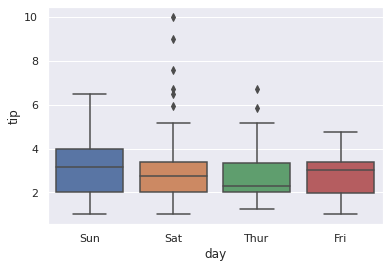

In [56]:
sns.boxplot(x = 'day', y = 'tip', data=df)

Ещё один способ увеличения информативности методов Seaborn — использование параметра hue. Он позволяет дополнительно разделять отображаемые данные в зависимости от значения нового категориального признака. Посмотрите, как меняется отображение boxplot при добавлении параметра hue:

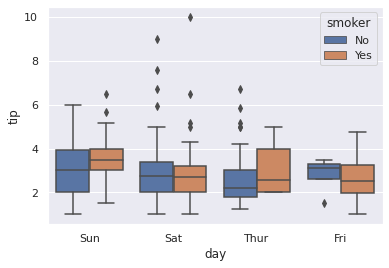

In [57]:
sns.boxplot(x = 'day', y = 'tip', data=df, hue ='smoker')

# Python 10.11
Графики табличного типа

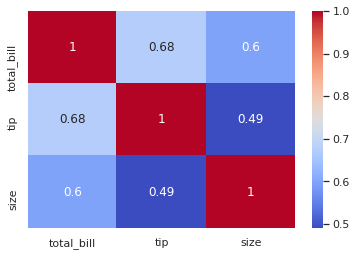

In [59]:
correlation = df.corr()
sns.heatmap(correlation, annot= True, cmap = 'coolwarm')

# Python 10.12 О библиотеке
Библиотека Plotly является коммерческим продуктом с бесплатной версией. С помощью этой библиотеки можно делать сложные визуализации с элементами управления. Например, отображать 3D диаграмму с выбором опций:
Мы дадим общий обзор основных возможностей библиотеки, а при необходимости вы сможете освоить более продвинутые функции под свои рабочие задачи.

Библиотека Plotly не входит в стандартный набор модулей Anaconda, поэтому ее следует установить. Это можно сделать с помощью менеджера пакетов pip, который запускается из командной строки или напрямую из jupyter notebook. В случае запуска менеджера пакетов из ячейки jupyter notebook перед текстом команды нужно добавить восклицательный знак.

In [60]:
!pip install plotly

Для эффективного взаимодействия Plotly с датафреймами Pandas нам понадобится библиотека Cufflinks. Установите её командой:


In [61]:

!pip install cufflinks

In [62]:

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

Для работы с библиотекой Plotly в режиме оффлайн включите этот режим:

In [64]:
init_notebook_mode(connected = True)
cf.go_offline()

In [68]:
df[['total_bill','tip']].iplot(kind='spread')